In [4]:
import re # for regular expressions
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk # for text manipulation
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [5]:
train_set = pd.read_csv('trainset copy final.csv')
test_set = pd.read_csv('tst2.csv')

In [6]:
test_set.head()

,id,tweet
0,26001,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,26002,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,26003,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,26004,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,26005,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [7]:
train_set.shape

(31949, 3)

In [8]:
#displaying some non-negative tweets
train_set[train_set['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [9]:
#displaying some negative tweets
train_set[train_set['label'] == 1].head(10) 

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


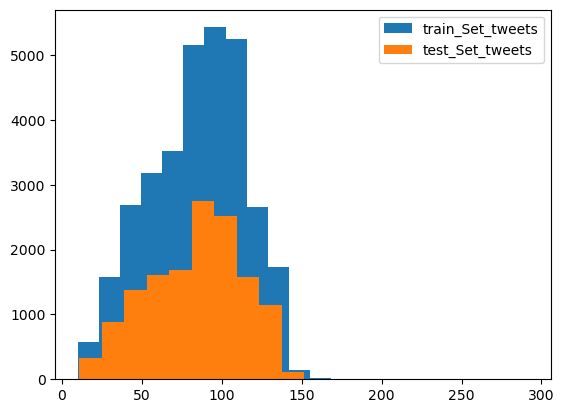

In [10]:
#distribution of length of length of both train and test tweets
length_train_set = train_set['tweet'].str.len()
length_test_set = test_set['tweet'].str.len()
plt.hist(length_train_set, bins=20, label="train_Set_tweets")
plt.hist(length_test_set, bins=20, label="test_Set_tweets")
plt.legend()
plt.show()    

In [15]:
#combining both train and test tweets
combine = train_set.append(test_set, ignore_index=True,sort=False)
combine.shape
def remove_pattern(input_txt, pattern):
   r = re.findall(pattern, input_txt)
   for i in r:
       input_txt = re.sub(i, '', input_txt)
   return input_txt

C:\Users\mravill2\AppData\Local\Temp\ipykernel_22504\926710462.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train_set.append(test_set, ignore_index=True,sort=False)


In [16]:
combine['cleaned_tweet']=np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
combine['cleaned_tweet']=combine['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)

C:\Users\mravill2\AppData\Local\Temp\ipykernel_22504\2310060974.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['cleaned_tweet']=combine['cleaned_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


In [19]:
combine['cleaned_tweet'] = combine['cleaned_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [21]:
#Tokenization step
tokenized_tweet = combine['cleaned_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: cleaned_tweet, dtype: object

In [22]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
   tokenized_tweet[i] = ' '.join(tokenized_tweet[i])  
combine['cleaned_tweet'] = tokenized_tweet
combine.head()

,id,label,tweet,cleaned_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


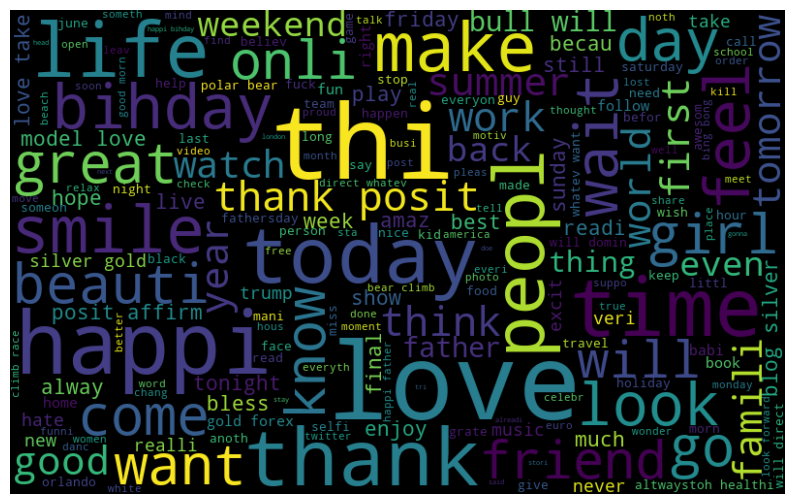

In [25]:
#Visualisation of most frequented words using WordCloud
all_words = ' '.join([text for text in combine['cleaned_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

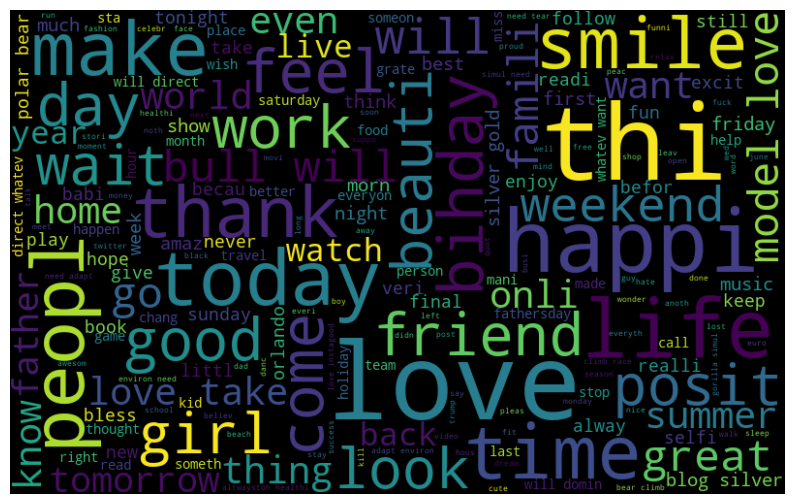

In [26]:
normal_words=''.join([text for text in combine['cleaned_tweet'][combine['label'] == 0]])
wordcloud=WordCloud(width=800,height=500,random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

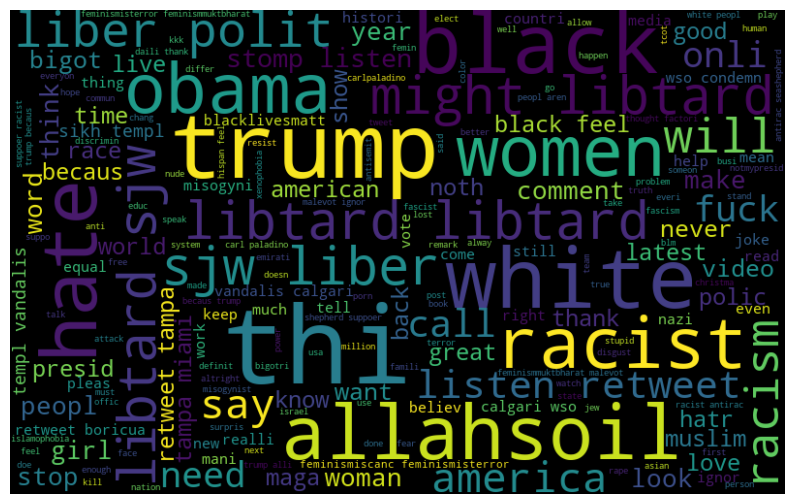

In [27]:
negative_words=' '.join([text for text in combine['cleaned_tweet'][combine['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [28]:
#Defining a function to collect hashtags
def extract_hashtag(x):
   hashtags = []
   # Loop over the words in the tweet
   for i in x:
       ht = re.findall(r"#(\w+)", i)
       hashtags.append(ht)
   return hashtags

In [29]:
#extracting hashtags from non-negative tweets
HT_regular = extract_hashtag(combine['cleaned_tweet'][combine['label'] == 0])

In [30]:
# extracting hashtags from negative tweets
HT_negative = extract_hashtag(combine['cleaned_tweet'][combine['label'] == 1])

In [31]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})

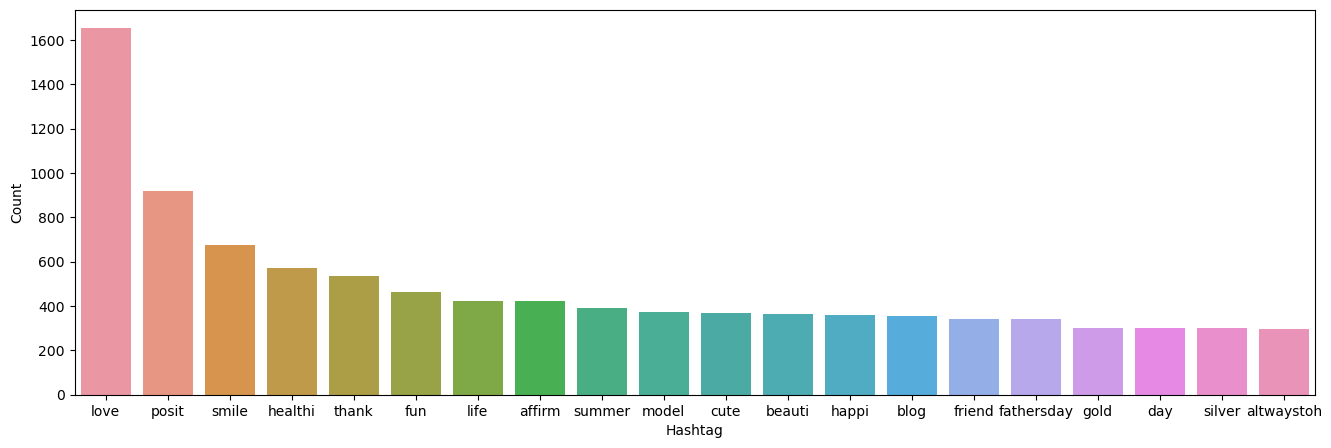

In [32]:
# selecting top 20 most frequent hashtags    
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

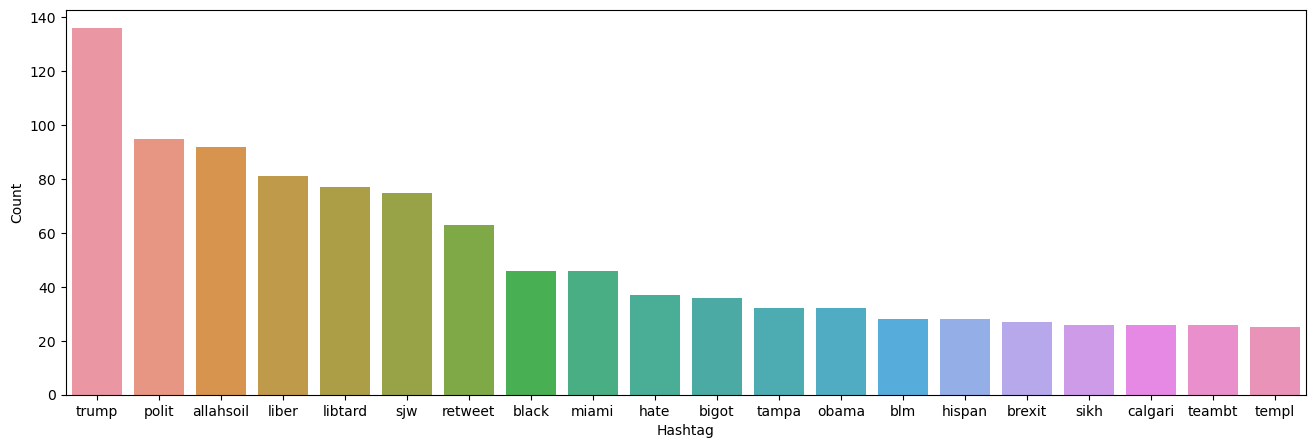

In [33]:
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)  
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [36]:
#Extracting Features from cleaned tweets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

In [37]:
#Bag_of_Words Approach
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combine['cleaned_tweet'])
bow.shape

(45950, 1000)

In [38]:
#TF_IDF Approach
tfidf_vectorizer= TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combine['cleaned_tweet'])
tfidf.shape

(45950, 1000)

In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [40]:
train_bow = bow[:31949,:]
test_bow = bow[31949:,:]

In [41]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train_set['label'], random_state=42,test_size=0.3)


In [42]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 then 1 else 0
prediction_int = prediction_int.astype(np.int)


In [43]:
f1_score(yvalid, prediction_int) # calculating f1 score

0.5477707006369428

In [44]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test_set['label'] = test_pred_int
submission = test_set[['id','label','tweet']]
submission.to_csv('sub_lreg_bow1.csv', index=False)
submission.shape

(14001, 3)

In [45]:
train_tfidf = tfidf[:31949, :]
test_tfidf = tfidf[31949:, :]

In [46]:
xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index] 

In [50]:
lreg=LogisticRegression()
lreg.fit(xtrain_tfidf, ytrain)

LogisticRegression()

In [48]:
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

In [49]:
f1_score(yvalid, prediction_int)

0.5586776859504133